In [1]:
import pandas as pd
import geopandas as gpd
import numpy as np
import warnings

# Suppress all warnings
warnings.filterwarnings('ignore')

In [19]:

df_supply = pd.read_csv('../artifacts/data/cleaned/media_county_counts.csv')
df_demand = pd.read_csv('../artifacts/data/cleaned/media_demand.csv')


In [7]:

df_demand['County'] = df_demand['Area_Name'].str.replace(' county', '', case=False).str.strip()
df_demand.loc[df_demand['State'] == 'LA', 'County'] = df_demand.loc[df_demand['State'] == 'LA', 'County'].str.replace(' Parish', '', regex=False)


In [9]:
df_demand.loc[df_demand['State'] == 'AK', 'County'] = df_demand.loc[df_demand['State'] == 'AK', 'County'].str.replace('Borough', '', regex=False)
df_demand.loc[df_demand['State'] == 'AK', 'County'] = df_demand.loc[df_demand['State'] == 'AK', 'County'].str.replace('Census Area', '', regex=False)
df_demand.loc[df_demand['State'] == 'AK', 'County'] = df_demand.loc[df_demand['State'] == 'AK', 'County'].str.replace('City and Borough', '', regex=False)
df_demand.loc[df_demand['State'] == 'AK', 'County'] = df_demand.loc[df_demand['State'] == 'AK', 'County'].str.replace('Municipality', '', regex=False)
df_demand.loc[df_demand['State'] == 'AK', 'County'] = df_demand.loc[df_demand['State'] == 'AK', 'County'].str.replace('City and', '', regex=False)

In [11]:
df_demand.loc[df_demand['State'] == 'AK', 'County'] = df_demand.loc[df_demand['State'] == 'AK', 'County'].str.replace('City and', '', regex=False)

In [12]:
df_demand.to_csv('../artifacts/data/cleaned/media_demand.csv', index=False)

In [34]:
df_supply_demand = df_supply.merge(df_demand, how='left', left_on=['state', 'county'], right_on=['State', 'County'])

In [35]:
df_supply_demand 

,Geography,count_tv,count_radio,count_newspaper,county,state,STATEFP,COUNTYFP,COUNTYNS,AFFGEOID,...,Digital devices_Pop_Collage_Plus,Television_Demand_Pop,Television_Demand_Percent,Radio_Demand_Pop,Radio_Demand_Percent,Print_Demand_Pop,Print_Demand_Percent,Digital devices_Demand_Pop,Digital devices_Demand_Percent,County
0,0500000US01001,3,2,3,Autauga,AL,1.0,1.0,161526.0,0500000US01001,...,15618.0,37676.0,63.05,30996.0,51.87,21769.0,36.43,50762.0,84.94,Autauga
1,0500000US01003,1,17,23,Baldwin,AL,1.0,3.0,161527.0,0500000US01003,...,74486.0,154195.0,62.57,127603.0,51.78,89737.0,36.41,211989.0,86.02,Baldwin
2,0500000US01005,0,3,8,Barbour,AL,1.0,5.0,161528.0,0500000US01005,...,2575.0,16004.0,64.78,12904.0,52.23,9007.0,36.46,20294.0,82.14,Barbour
3,0500000US01007,0,2,4,Bibb,AL,1.0,7.0,161529.0,0500000US01007,...,2436.0,14266.0,64.83,11504.0,52.28,8036.0,36.52,18019.0,81.89,Bibb
4,0500000US01009,0,1,8,Blount,AL,1.0,9.0,161530.0,0500000US01009,...,8248.0,38189.0,64.17,30966.0,52.03,21622.0,36.33,49646.0,83.42,Blount
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3230,0500000US72151,0,0,0,Yabucoa,PR,72.0,151.0,1804556.0,0500000US72151,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3231,0500000US72153,0,0,0,Yauco,PR,72.0,153.0,1804557.0,0500000US72153,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3232,NaN,0,0,0,NaN,NaN,78.0,10.0,2378248.0,0500000US78010,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3233,NaN,0,0,0,NaN,NaN,78.0,20.0,2378249.0,0500000US78020,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [37]:
df_supply_demand['tv_ratio'] = df_supply_demand['count_tv'] / df_supply_demand['Television_Demand_Pop']*100000
df_supply_demand['radio_ratio'] = df_supply_demand['count_radio'] / df_supply_demand['Radio_Demand_Pop']*100000
df_supply_demand['newspaper_ratio'] = df_supply_demand['count_newspaper'] / df_supply_demand['Print_Demand_Pop']*100000
ratio_columns = ['tv_ratio', 'radio_ratio', 'newspaper_ratio']
df_supply_demand[ratio_columns] = df_supply_demand[ratio_columns].fillna(0)
df_supply_demand

,Geography,count_tv,count_radio,count_newspaper,county,state,STATEFP,COUNTYFP,COUNTYNS,AFFGEOID,...,Radio_Demand_Pop,Radio_Demand_Percent,Print_Demand_Pop,Print_Demand_Percent,Digital devices_Demand_Pop,Digital devices_Demand_Percent,County,tv_ratio,radio_ratio,newspaper_ratio
0,0500000US01001,3,2,3,Autauga,AL,1.0,1.0,161526.0,0500000US01001,...,30996.0,51.87,21769.0,36.43,50762.0,84.94,Autauga,7.962629,6.452445,13.781065
1,0500000US01003,1,17,23,Baldwin,AL,1.0,3.0,161527.0,0500000US01003,...,127603.0,51.78,89737.0,36.41,211989.0,86.02,Baldwin,0.648529,13.322571,25.630453
2,0500000US01005,0,3,8,Barbour,AL,1.0,5.0,161528.0,0500000US01005,...,12904.0,52.23,9007.0,36.46,20294.0,82.14,Barbour,0.000000,23.248605,88.819807
3,0500000US01007,0,2,4,Bibb,AL,1.0,7.0,161529.0,0500000US01007,...,11504.0,52.28,8036.0,36.52,18019.0,81.89,Bibb,0.000000,17.385257,49.776008
4,0500000US01009,0,1,8,Blount,AL,1.0,9.0,161530.0,0500000US01009,...,30966.0,52.03,21622.0,36.33,49646.0,83.42,Blount,0.000000,3.229348,36.999353
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3230,0500000US72151,0,0,0,Yabucoa,PR,72.0,151.0,1804556.0,0500000US72151,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000
3231,0500000US72153,0,0,0,Yauco,PR,72.0,153.0,1804557.0,0500000US72153,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000
3232,NaN,0,0,0,NaN,NaN,78.0,10.0,2378248.0,0500000US78010,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000
3233,NaN,0,0,0,NaN,NaN,78.0,20.0,2378249.0,0500000US78020,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000


In [38]:
df_supply_demand.to_csv('../artifacts/data/cleaned/media_supply_demand.csv', index=False)

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

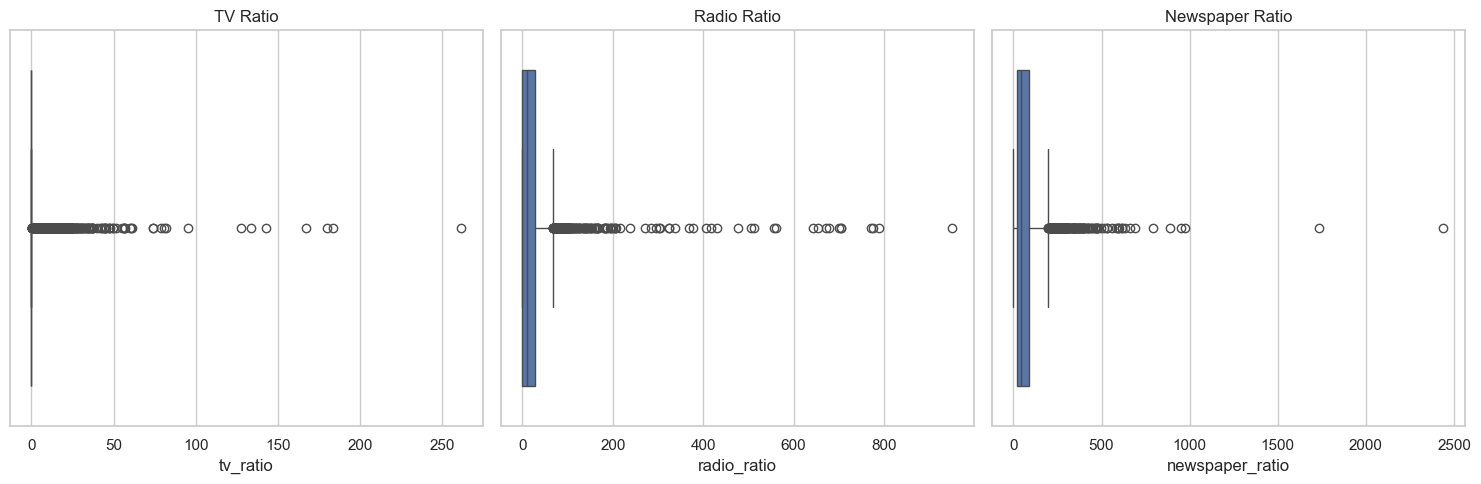

In [40]:
# Set the style of the visualization
sns.set(style="whitegrid")

# Create a figure and a set of subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Create box plots
sns.boxplot(ax=axes[0], x=df_supply_demand['tv_ratio'])
axes[0].set_title('TV Ratio')

sns.boxplot(ax=axes[1], x=df_supply_demand['radio_ratio'])
axes[1].set_title('Radio Ratio')

sns.boxplot(ax=axes[2], x=df_supply_demand['newspaper_ratio'])
axes[2].set_title('Newspaper Ratio')

# Enhance layout
plt.tight_layout()

# Display the plot
plt.show()


In [41]:
import pandas as pd

def create_color_column(df, column_name, new_color_column):
    """
    Modifies the DataFrame to include a new column for color-coding values in another column,
    based on adjusted thresholds that exclude outliers.

    Parameters:
        df (pd.DataFrame): The DataFrame to modify.
        column_name (str): The name of the column from which to base the colors.
        new_color_column (str): The name of the new column to create for the colors.
    """
    # Step 1: Replace NaN values with zero
    df[column_name].fillna(0, inplace=True)

    # Step 2: Calculate the interquartile range to determine thresholds without outliers
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1

    # Define bounds that exclude outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filter data to exclude outliers for threshold determination
    filtered_data = df[(df[column_name] >= lower_bound) & (df[column_name] <= upper_bound)]

    # Recalculate min and max on filtered data
    min_value = filtered_data[column_name].min()
    max_value = filtered_data[column_name].max()

    # Calculate equal distribution thresholds based on filtered data
    threshold1 = min_value + (max_value - min_value) / 3
    threshold2 = min_value + 2 * (max_value - min_value) / 3

    # Step 3: Assign colors based on thresholds
    def assign_color(value):
        if value <= threshold1:
            return 'red'
        elif value <= threshold2:
            return 'yellow'
        else:
            return 'green'

    df[new_color_column] = df[column_name].apply(assign_color)




In [44]:

create_color_column(df_supply_demand, 'tv_ratio', 'tv_color')
create_color_column(df_supply_demand, 'radio_ratio', 'radio_color')
create_color_column(df_supply_demand, 'newspaper_ratio', 'newspaper_color')

In [46]:
df_supply_demand.to_csv('../artifacts/data/cleaned/media_supply_demand_color.csv', index=False)